In [19]:
import pandas as pd
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)
pd.set_option("display.width", 10000)


df = pd.read_parquet("data_for_anton.parquet")
df_formatted=pd.DataFrame(columns=["benchmark","prior","algorithm","fidelity","seed","score"])
df=df.reset_index()
df_collection=[]
for seed_nr in range(50):
    partial_df=df[["benchmark","prior","algorithm","used_fidelity"]]
    partial_df["value"]=df[f"seed-{seed_nr}"]
    partial_df["seed"]=seed_nr
    df_collection.append(partial_df)
    print(f"Seed {seed_nr+1}/50", end="\r", flush=True)
df_formatted=pd.concat(df_collection,ignore_index=True)

In [20]:
unique=list(df_formatted["algorithm"].unique())
dict={}
for algo in df_formatted["algorithm"].unique():
    if "pb_mutation" in algo:
        dict[algo]="pb_mutation"
        unique.remove(algo)
    elif "priorband_hypersphere" in algo or "pb_hypersphere" in algo:
        dict[algo]="priorband_hypersphere"
        unique.remove(algo)
    elif "priorband_crossover" in algo or "pb_crossover" in algo:
        dict[algo]="priorband_crossover"
        unique.remove(algo)
    elif "random_search" in algo:
        dict[algo]="random_search"
        unique.remove(algo)
    elif "bo" in algo:
        dict[algo]="bo"
        unique.remove(algo)
    elif "asha" in algo:
        dict[algo]="asha"
        unique.remove(algo)
    elif "hb" in algo or "hyperband" in algo:
        dict[algo]="hb"
        unique.remove(algo)

def map_values(value):
    mapped_value = dict.get(value, value)
    return mapped_value

df_formatted["algorithm_family"]=df_formatted['algorithm']
print(len(df_formatted["algorithm_family"].unique()))
df_formatted["algorithm_family"]=df_formatted['algorithm_family'].map(map_values)
print(df_formatted["algorithm_family"].unique())

58
['pb_mutation' 'priorband_crossover' 'bo' 'priorband_hypersphere' 'hb'
 'asha' 'random_search' 'priorband-50' 'priorband']


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [5]:
system_id="algorithm_family"

df_autorank_format=pd.DataFrame(columns=list(df_formatted[system_id].unique()))
df_collector=[]
for number,algo in enumerate(df_formatted[system_id].unique()):
    algo_df=pd.DataFrame(df_formatted.loc[df_formatted[system_id]==algo]["value"])
    algo_df=algo_df.rename(columns={"value":algo})
    df_collector.append(algo_df[algo].to_list())
df_collector=list(zip(*df_collector))
df_autorank_format = pd.DataFrame(df_collector,columns=df_formatted[system_id].unique())

c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Rejecting null hypothesis that data is normal for column pb_mutation (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column priorband_crossover (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column bo (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column priorband_hypersphere (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column hb (p=0.000000<0.005556)
Fail to reject null hypothesis that data is normal for column asha (p=1.000000>=0.005556)
Rejecting null hypothesis that data is normal for column random_search (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column priorband-50 (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column priorband (p=0.000000<0.005556)
Using Levene's test for homoscedacity of non-normal data.
Rejecting null hypothesis that all variances are equal (p=nan<0.050000)
Using Friedman test as omnibus test
Rejecting null 

<Axes: >

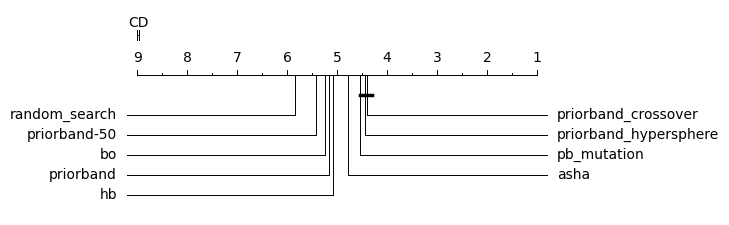

In [6]:
result=autorank(df_autorank_format,
         alpha=0.05,
         verbose=True)
create_report(result)
plot_stats(result)

[0.019230769230769232, 0.385]
8


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical analysis was conducted for 8 populations with 15000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations hb (p=0.000), priorband (p=0.000), bo (p=0.000), pb_mutation (p=0.000), priorband_crossover (p=0.000), priorband_hypersphere (p=0.000), and asha (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than th

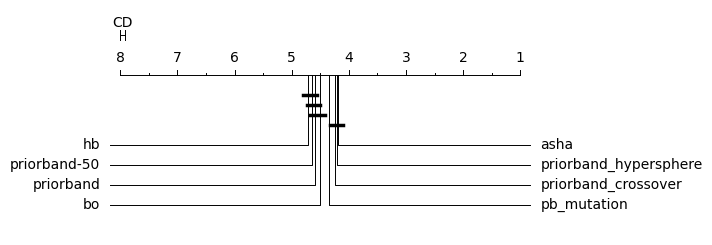

[0.385, 1.090909090909091]
9


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical analysis was conducted for 9 populations with 7800 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations random_search (p=0.000), priorband-50 (p=0.000), hb (p=0.000), bo (p=0.000), priorband (p=0.000), pb_mutation (p=0.000), priorband_hypersphere (p=0.000), and priorband_crossover (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of 

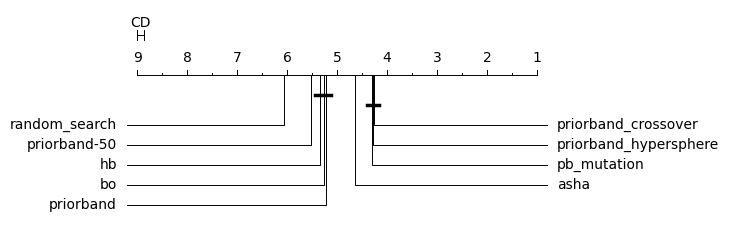

[1.090909090909091, 3.153846153846154]
9


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical analysis was conducted for 9 populations with 12050 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations priorband-50 (p=0.000), random_search (p=0.000), priorband (p=0.000), bo (p=0.000), hb (p=0.000), asha (p=0.000), pb_mutation (p=0.000), priorband_hypersphere (p=0.000), and priorband_crossover (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if t

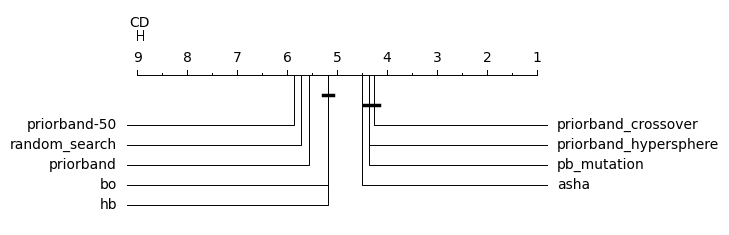

[3.153846153846154, 9.545454545454547]
9


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical analysis was conducted for 9 populations with 13300 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations priorband-50 (p=0.000), priorband (p=0.000), hb (p=0.000), random_search (p=0.000), bo (p=0.000), priorband_hypersphere (p=0.000), pb_mutation (p=0.000), priorband_crossover (p=0.000), and asha (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if t

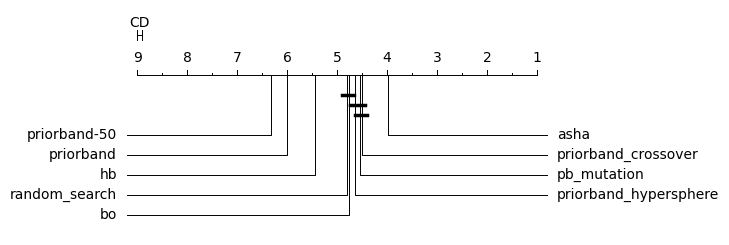

[9.545454545454547, 17.28]
9


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical analysis was conducted for 9 populations with 10850 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations priorband-50 (p=0.000), priorband (p=0.000), hb (p=0.000), random_search (p=0.000), priorband_hypersphere (p=0.000), bo (p=0.000), priorband_crossover (p=0.000), pb_mutation (p=0.000), and asha (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if t

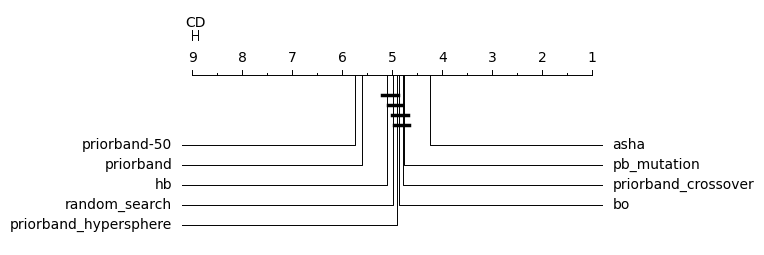

[17.28, 78.5929648241206]
9


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistical analysis was conducted for 9 populations with 8650 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations priorband-50 (p=0.000), priorband (p=0.000), bo (p=0.000), random_search (p=0.000), hb (p=0.000), pb_mutation (p=0.000), priorband_crossover (p=0.000), asha (p=0.000), and priorband_hypersphere (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if th

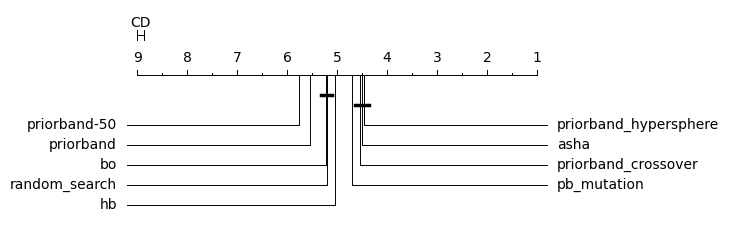

In [45]:
system_id="algorithm_family"
n_fidelity_groups=6
fidelities=df_formatted["used_fidelity"].to_numpy()
linspace=np.linspace(0,1,n_fidelity_groups+1,True)
fidelity_groups=[]
for i in range(n_fidelity_groups):
     fidelity_groups.append([np.quantile(fidelities,linspace[i]),np.quantile(fidelities,linspace[i+1])])

for fidelity_group in fidelity_groups:
     df_fidelity=pd.DataFrame()#columns=list(df_formatted[system_id].unique()))
     df_collector=[]
     names=[]
     print(fidelity_group)
     for number,algo in enumerate(df_formatted[system_id].unique()):
          algo_df=pd.DataFrame(df_formatted.loc[(df_formatted[system_id]==algo)&(df_formatted["used_fidelity"]>=fidelity_group[0])&(df_formatted["used_fidelity"]<fidelity_group[1])]["value"])
          algo_df=algo_df.rename(columns={"value":algo})
          if len(algo_df)>5:
               df_collector.append(algo_df[algo].to_list())
               names.append(algo)
     print(len(df_collector))
     df_collector=list(zip(*df_collector))
     
     df_fidelity = pd.DataFrame(df_collector,columns=names)#df_formatted[system_id].unique())#names)
     result=autorank(df_fidelity,
          alpha=0.05,
          verbose=False)
     create_report(result)
     plot_stats(result)
     plt.show()